In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#INPUTS:
#L: list to randomly choose subset from
#k: k sized subset tp pick from array
#OUTPUT:
#subset: the random subset array picked from original list
def rand_subset(L, k):
    s = len(L)
    items = np.linspace(0,s-1,s).astype(int)
    np.random.shuffle(items)
    index = items[:k]
    L = np.array(L)
    subset = L[index]
    return subset

#INPUTS:
# ls: list of items to select from
# stn: array of strength's corresponding to items
# n: top n to return
#OUTPUT:
# select: selection of n most fit items
def selection(ls, stn, n):
    stn = -stn
    index = np.argsort(stn)[:n]
    select = ls[index]
    return select

#INPUTS:
# subset: array of old polulation
# L: list of all possible people in population
# k: size of subset, the old population 
# n: number of top people kept from last population in subset
#OUTPUT:
# new_pop: new iteration of list including
#           elements of last list and and randomized
#           rest of subset population.
def repopulate(subset,L, k, n):
    #amount r needed to repopulate
    r = k - n
    #remove elements already included
    remain = np.setdiff1d(L,subset)
    # pick r new people
    rest = rand_subset(remain, r)
    #new people join old population
    new_pop = np.concatenate((subset, rest))
    return new_pop

In [46]:
#Imagine minimization problem: F*a=y (or a*f(x)=y, a linear parameter)
#Find the a that gets F*a closest to y
#F is mxn matrix with columns populated
#by n different f_j(x) functions or features
#a is n-vector, y is an m-vector
#We are optimizing over a's 
#but stochastic over the choice i's,
#the different row of equations
# which is also the equivalent number of loss fucntions

#Possible function space 
#(create your own, make sure to update both)

#INPUTs:
# a: parameters needing optimization (size n), use numpy array
# x: 1d positional scalar (lowercase)
#   (may have n variational functionals f_j(x) )
#   i.e, a_0*f_0(x)+a_1*f_1(x)+...+a_n*f_n(x)
#OUTPUT:
# X: feature F(x) values 
def F(x):
    X = np.array([x**0,x,x**2,x**3])
    return X


#INPUTS:
# X: F(x) values after function action
# a: parameters needing optimization (size n), use numpy array
#OUTPUT:
# f: function value evaluated at 'a' and 'x' (lowercase)
def f(a,X) :
    f = np.dot(a,X)
    return f

#Exact gradient of f(a,x), linear in a, in respect to 'a'
#INPUTS:
# X: F(x) values after function action
# a: parameters needing optimization (size n), use numpy array
def grad_f(a,X):
    return X

#Possible optional generator of data y
#Instead import your own data
#INPUTS:
# a: linear factors (numpy array)
# x: x values in F(x) (scalar or numpy array)
# s: variance/size of noise to add
# norm: boolian determines variance dependence on size of f(a,X)
def Y(a,x,s = 1, norm = False):
    X = F(x)
    m = x.size
    if norm == False:
        return np.array([x, f(a,X) + np.random.normal(0,s,m)])
    else:
        f0 = f(a,X)
        nor = np.zeros(m)
        for i in range(m):
            nor[i] = np.absolute(f0[i])
        return np.array([x,f0 + nor*np.random.normal(0,s,m)])
            
#Example loss function to be optimized
#INPUTS:
# a: array of linear coefficients
# X: F(x) values after function action
# y: scalar of coordiante 
def phi(a,X,y):
    return (f(a,X) - y)**2

#Given phi loss function above
#Local Gradient
def grad_phi(a,X,y):

    return 2*(f(a,X)-y)*grad_f(a,X)

#Total loss function (an type of average)
def cost(X,y,a):
    P = phi(a,X,y)
    return np.average(P)

In [48]:
#Possible optional generator of data y
#Instead import your own data
#INPUTS:
# a: linear factors numerator (numpy array)
# b: linear factors denominator (numpy array)
# x: x values in F(x) (scalar or numpy array)
# s: variance/size of noise to add
# norm: boolian determines variance dependence on size of f(a,X)
def Y(a,x,s = 1, norm = False):
    X = F(x)
    m = x.size
    if norm == False:
        return np.array([x, f(a,X) + np.random.normal(0,s,m)])
    else:
        f0 = f(a,b,X)
        nor = np.zeros(m)
        for i in range(m):
            nor[i] = np.absolute(f0[i])
        return np.array([x,f0 + nor*np.random.normal(0,s,m)])

#INPUTS:
# X: F(x) values after function action
# a: parameters needing optimization (size n), use numpy array
#OUTPUT:
# f: function value evaluated at 'a' and 'x' (lowercase)
def f2(a,b,X) :
    f2 = np.dot(a,X)/np.dot(b,X)
    return f2

#Exact gradient of f(a,x), linear in a, in respect to 'a'
#INPUTS:
# X: F(x) values after function action
# a: parameters needing optimization (size n), use numpy array
def grad_f2(a,b,X):
    s1 = a.size
    s2 = b.size
    grad = np.zeros(s1+s2)
    grad[:s1] = X/np.dot(a,X)
    grad[s1:] = -X/(np.dot(a,X)**2)
    return grad

#Example loss function to be optimized
#INPUTS:
# a: array of linear coefficients
# X: F(x) values after function action
# y: scalar of coordiante 
def phi2(a,X,y):
    return (f(a,b,X) - y)**2

#Given phi loss function above
#Local Gradient
def grad_phi2(a,b,X,y):

    return 2*(f(a,X)-y)*grad_f(a,X)

#Total loss function (an type of average)
def cost2(X,y,a):
    P = phi2(a,X,y)
    return np.average(P)

In [5]:
#INPUT:
# X: input values 'x'
# s: size of features
#OUTPUT:
# Fu: Function/Feature values standardized
# m: array of mean shifts for each feature
# v_s: array of standard deviation scales for each feature
def preprocess(X,s):
    m = np.mean(X, axis = 1)
    v = np.var(X, axis = 1)
    v_s = np.sqrt(v)
    for i in range(1,s):
        X[i] = (X[i]-m[i])
    if (v[i] != 0):
        X[i] = X[i]/v_s[i]
    return X, m, v_s

#INPUT:
#a: preprocessed learned 'a' values
#m: array of mean shifts for each feature
#v_s: array of standard deviation scales for each feature
#s: size of features
#OUTPUT:
#a_r: augmented 'a' values that correspond to original problem
def postprocess(a,m,v_s,s):
    a_r = np.zeros(s)
    for i in range(1,s):
        a_r[i] = a[i]/v_s[i]
    a_r[0]= a[0]-np.sum(a[1:]*m[1:]/v_s[1:])
    return a_r

In [50]:
#Stochastic Gradient Descent Algorithm
#INPUTS:
#a0: intial guess for parameters a (can be randomly assigned or zero vector)
#C: coordinate data [x,y] x grouped and y grouped
#K: size of stochastic subset of data to gradient-step in
#eta: learning-rate/stepping size
#num: number of iterations/steps
#OUTPUT:

def SGD(a0, C, eta, K, num, p):
    #size of Operator
    m = np.size(C,1)
    n = np.size(a0)
    
    X = F(C[0]) #NEW
    
    A = np.zeros((num,n))
    A[0] = a0
    L = [i for i in range(m)]
    
    #initialize subset choice
    L_k = rand_subset(L,K)
    
    for l in range(1,num):
        #updating new 'a' value
        G = np.zeros(n)
        
        #initialize subset choice
        L_k = rand_subset(L,K)
        
        for j in L_k:
            #store gradient contribution
            g = grad_phi(A[l-1],X[:,j],C[1][j]) #MEW
            #add to overall gradient
            G = G + g
        
        G = G/K
        A[l] = A[l-1] - eta*G/(l**p)

    print('Gradient:',G)
    return A

#Main Evolutionary Stochastic Gradient Descent Algorithm
#INPUTS:
#a0: intial guess for parameters a (can be randomly assigned or zero vector)
#C: coordinate data [x,y] x grouped and y grouped
#K: size of stochastic subset of data to gradient-step in
#eta: learning-rate/stepping size
#num: number of iterations/steps
#T : number of top (data) members to keep before randomizing next subset via SGD
#OUTPUT:
#A: Matrix of rows of a values throughout iteration

def evSGDdb(a0, C, eta, K, num, p, T):
    #size of Operator
    m = np.size(C,1)
    n = np.size(a0)
    
    X = F(C[0]) #NEW
    
    A = np.zeros((num,n))
    A[0] = a0
    L = [i for i in range(m)]
    
    #initialize subset choice
    L_k = rand_subset(L,K)
    
    for l in range(1,num):
        #updating new 'a' value
        G = np.zeros(n)
        g_size = np.zeros(K)
        i = 0
        
        #initialize subset choice
        L_k = rand_subset(L,K)
        
        for j in L_k:
            #store gradient contribution
            g = grad_phi(A[l-1],X[:,j],C[1][j]) #NEW
            #add to overall gradient
            G = G + g
            
            #restore gradient as its magnitude (L2 Norm <- choice) for evolution decision later 
            g_size[i] = np.linalg.norm(g)
            i = i + 1

        G = G/K
        A[l] = A[l-1] - eta*G/(l**p)

        #reseting the population before next iteration
        select = selection(L_k,g_size, T)
        L_k = repopulate(select,L, K, T)
    print('Gradient:',G)
    return A

In [32]:
#Stochastic Gradient Descent Algorithm
#INPUTS:
#a0: intial guess for parameters a (can be randomly assigned or zero vector)
#C: coordinate data [x,y] x grouped and y grouped
#K: size of stochastic subset of data to gradient-step in
#eta: learning-rate/stepping size
#num: number of iterations/steps
#OUTPUT:

def SGDs(a0, C, eta, K, num, p):
    #size of Operator
    m = np.size(C,1)
    n = np.size(a0)
    
    X = F(C[0]) #NEW
    X, M, v_s = preprocess(X,n)
    
    A = np.zeros((num,n))
    A[0] = a0
    L = [i for i in range(m)]
    
    #initialize subset choice
    L_k = rand_subset(L,K)
    
    for l in range(1,num):
        #updating new 'a' value
        G = np.zeros(n)
        
        #initialize subset choice
        L_k = rand_subset(L,K)
        
        for j in L_k:
            #store gradient contribution
            g = grad_phi(A[l-1],X[:,j],C[1][j]) #MEW
            #add to overall gradient
            G = G + g
        
        G = G/K
        A[l] = A[l-1] - eta*G/(l**p)

    print('Gradient:',G)
    for i in range(1,num):
        A[i] = postprocess(A[i],M,v_s,n)
    return A

#Main Evolutionary Stochastic Gradient Descent Algorithm
#INPUTS:
#a0: intial guess for parameters a (can be randomly assigned or zero vector)
#C: coordinate data [x,y] x grouped and y grouped
#K: size of stochastic subset of data to gradient-step in
#eta: learning-rate/stepping size
#num: number of iterations/steps
#T : number of top (data) members to keep before randomizing next subset via SGD
#OUTPUT:
#A: Matrix of rows of a values throughout iteration

def evSGDs(a0, C, eta, K, num, p, T):
    #size of Operator
    m = np.size(C,1)
    n = np.size(a0)
    
    X = F(C[0]) #NEW
    X, M, v_s = preprocess(X,n)
    
    A = np.zeros((num,n))
    A[0] = a0
    L = [i for i in range(m)]
    
    #initialize subset choice
    L_k = rand_subset(L,K)
    
    for l in range(1,num):
        #updating new 'a' value
        G = np.zeros(n)
        g_size = np.zeros(K)
        i = 0
        
        #initialize subset choice
        L_k = rand_subset(L,K)
        
        for j in L_k:
            #store gradient contribution
            g = grad_phi(A[l-1],X[:,j],C[1][j]) #NEW
            #add to overall gradient
            G = G + g
            
            #restore gradient as its magnitude (L2 Norm <- choice) for evolution decision later 
            g_size[i] = np.linalg.norm(g)
            i = i + 1

        G = G/K
        A[l] = A[l-1] - eta*G/(l**p)

        #reseting the population before next iteration
        select = selection(L_k,g_size, T)
        L_k = repopulate(select,L, K, T)
    print('Gradient:',G)
    for i in range(1,num):
        A[i] = postprocess(A[i],M,v_s,n)
    return A

Gradient: [0.389649 -0.848647 6.498730 -24.086473]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [1.445608 -0.991557 0.092325 0.009825]


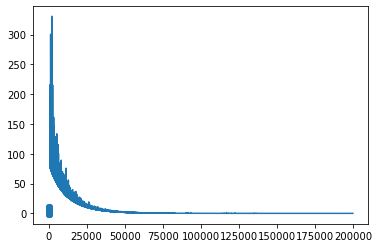

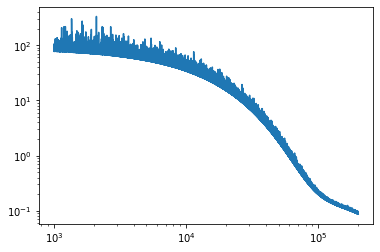

In [61]:
#Function Graph Statements
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = evSGDdb(np.array([1,1,1,1]), M, .00001, 10,200000, .1,2)
print('Corect a:',a)
print('Termin a:',P[-1])

# V = f(P[-1],F(Z))
# plt.plot(Z,V)
# plt.show()

#Cost Graph Statement
S = np.size(P, axis = 0)
C = np.zeros(S)
for i in range(S):
    C[i] = cost(F(M[0]),M[1],P[i])
    
l = 1000
L = 200000
N = np.linspace(l,L,L-l)

plt.plot(N, C[l:L])
plt.show()

plt.loglog(N, C[l:L])
plt.show()

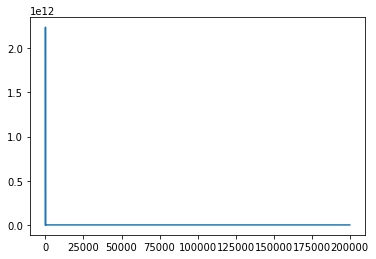

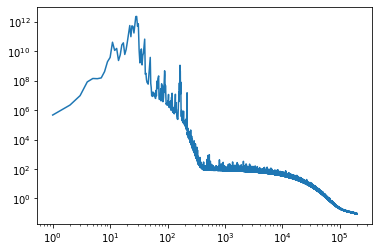

In [69]:
l = 1
L = 200000
N = np.linspace(l,L,L-l)

plt.plot(N, C[l:L])
plt.show()

plt.loglog(N, C[l:L])
plt.show()

In [70]:
#Function Graph Statements
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)

P0 = evSGDdb(np.array([1,1,1,1]), M, .000001, 10,200000, .1,2)
P1 = evSGDdb(np.array([1,1,1,1]), M, .000001*3, 10,200000, .1,2)
P2 = evSGDdb(np.array([1,1,1,1]), M, .00001, 10,200000, .1,2)
P3 = evSGDdb(np.array([1,1,1,1]), M, .00001*3, 10,200000, .1,2)

Gradient: [-1.232957 7.243499 -51.347026 -31.167686]
Gradient: [-0.020456 2.498797 10.134526 -5.516722]
Gradient: [0.000815 0.006058 -0.227554 -0.412255]


<ipython-input-50-48151be98d3c>:81: RuntimeWarning: overflow encountered in add
  G = G + g
<ipython-input-50-48151be98d3c>:81: RuntimeWarning: invalid value encountered in add
  G = G + g


Gradient: [nan nan nan nan]


In [81]:
P3 = evSGDdb(np.array([1,1,1,1]), M, .000011, 10,200000, .1,2)

Gradient: [94.734160 18.395582 -425.180618 -3803.055353]


In [82]:

#Cost Graph Statement
S = np.size(P0, axis = 0)
C0 = np.zeros(S)
C1 = np.zeros(S)
C2 = np.zeros(S)
C3 = np.zeros(S)
for i in range(S):
    C0[i] = cost(F(M[0]),M[1],P0[i])
    C1[i] = cost(F(M[0]),M[1],P1[i])
    C2[i] = cost(F(M[0]),M[1],P2[i])
    C3[i] = cost(F(M[0]),M[1],P3[i])


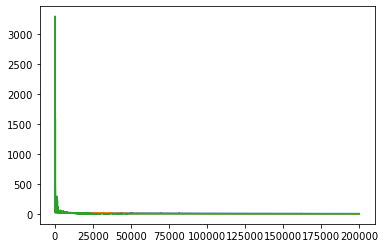

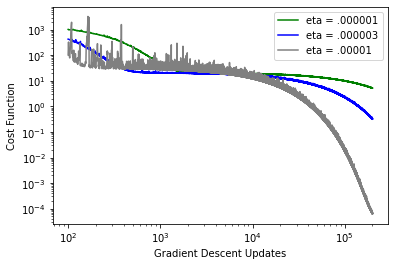

In [88]:
l = 100
L = 200000
N = np.linspace(l,L,L-l)

plt.plot(N, C0[l:L])
plt.plot(N, C1[l:L])
plt.plot(N, C2[l:L])
#plt.plot(N, C3[l:L])
plt.show()

plt.loglog(N, C0[l:L], color = 'green')
plt.loglog(N, C1[l:L], color = 'blue')
plt.loglog(N, C2[l:L], color = 'gray')
#plt.loglog(N, C3[l:L], color = 'red')
plt.legend(['eta = .000001', 'eta = .000003','eta = .00001','eta = .000011'])
plt.ylabel('Cost Function')
plt.xlabel('Gradient Descent Updates')
plt.show()

In [92]:
#Function Graph Statements
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)

P0 = evSGDdb(np.array([1,1,1,1]), M, .0000001, 10,200000, 0,2)
P1 = evSGDdb(np.array([1,1,1,1]), M, .000001*3, 10,200000, .15,2)
P2 = evSGDdb(np.array([1,1,1,1]), M, .000001*6, 10,200000, .15,2)
P3 = evSGDdb(np.array([1,1,1,1]), M, .00001, 10,200000, .15,2)

Gradient: [0.586203 6.191293 35.952285 -923.356127]
Gradient: [-0.320606 11.627555 -36.797143 336.922675]
Gradient: [0.134166 1.693582 6.060809 -9.509040]
Gradient: [0.024888 0.477639 1.163745 4.454428]


In [93]:

#Cost Graph Statement
S = np.size(P0, axis = 0)
C0 = np.zeros(S)
C1 = np.zeros(S)
C2 = np.zeros(S)
C3 = np.zeros(S)
for i in range(S):
    C0[i] = cost(F(M[0]),M[1],P0[i])
    C1[i] = cost(F(M[0]),M[1],P1[i])
    C2[i] = cost(F(M[0]),M[1],P2[i])
    C3[i] = cost(F(M[0]),M[1],P3[i])


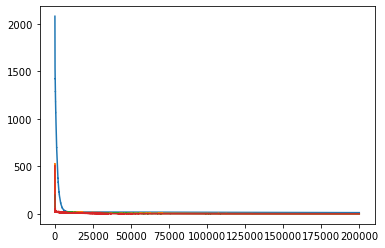

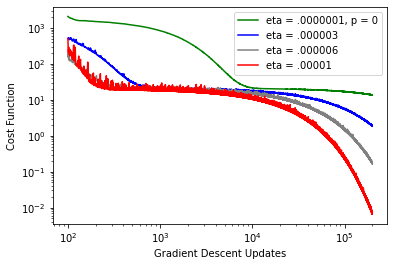

In [94]:
l = 100
L = 200000
N = np.linspace(l,L,L-l)

plt.plot(N, C0[l:L])
plt.plot(N, C1[l:L])
plt.plot(N, C2[l:L])
plt.plot(N, C3[l:L])
plt.show()

plt.loglog(N, C0[l:L], color = 'green')
plt.loglog(N, C1[l:L], color = 'blue')
plt.loglog(N, C2[l:L], color = 'gray')
plt.loglog(N, C3[l:L], color = 'red')
plt.legend(['eta = .0000001, p = 0', 'eta = .000003','eta = .000006','eta = .00001'])
plt.ylabel('Cost Function')
plt.xlabel('Gradient Descent Updates')
plt.show()

Gradient: [-0.085302 0.189727 -0.489134 6.214485]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [0.910612 -1.000426 0.101539 0.010044]


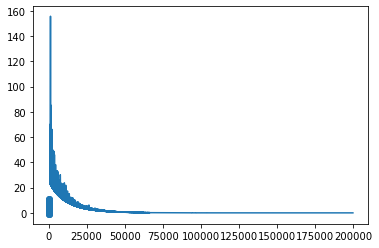

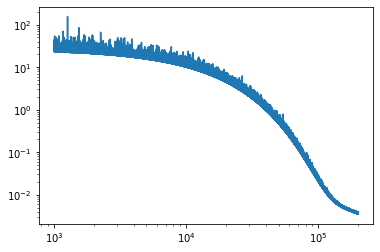

In [60]:
#Function Graph Statements
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = evSGDdb(np.array([1,1,1,1]), M, .00001, 10,200000, .1,2)
print('Corect a:',a)
print('Termin a:',P[-1])

# V = f(P[-1],F(Z))
# plt.plot(Z,V)
# plt.show()

#Cost Graph Statement
S = np.size(P, axis = 0)
C = np.zeros(S)
for i in range(S):
    C[i] = cost(F(M[0]),M[1],P[i])
    
l = 1000
L = 200000
N = np.linspace(l,L,L-l)

plt.plot(N, C[l:L])
plt.show()

plt.loglog(N, C[l:L])
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

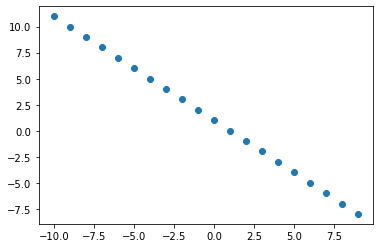

In [37]:
#Function Graph Statements
#a = np.array([1,-1,.1,.01])
a = np.array([1,-1])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGDs(np.array([1,1,1,1]), M, .00001, 10,200000, .1)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],F(Z))
plt.plot(Z,V)
plt.show()

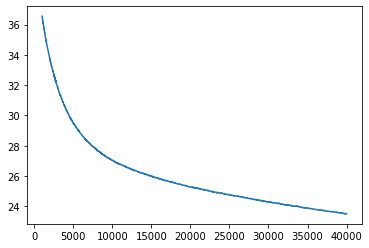

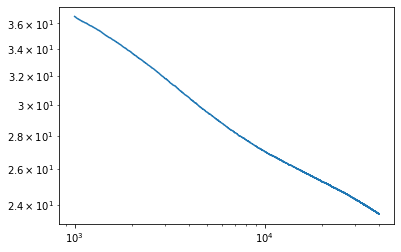

In [34]:
#Cost Graph Statement
S = np.size(P, axis = 0)
C = np.zeros(S)
for i in range(S):
    C[i] = cost(F(M[0]),M[1],P[i])
    
l = 1000
L = 40000
N = np.linspace(l,L,L-l)

plt.plot(N, C[l:L])
plt.show()

plt.loglog(N, C[l:L])
plt.show()

Gradient: [0.326166 -0.975365 29.566771 -414.335238]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [1.019476 -0.465580 0.094369 0.002475]


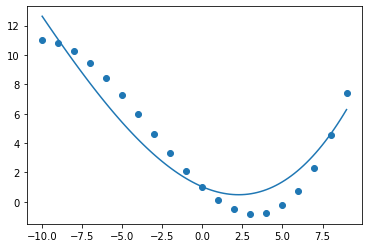

In [13]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .000001, 10,400000, .1)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],F(Z))
plt.plot(Z,V)
plt.show()

In [172]:
x = np.array([2.0,4.0,10.0,11.0])
X = F(x)
y = np.array([-.52,-.76,11,12])
a = np.array([1,1,1,1])
print(X)
np.array(X)[:,0]

[[1.000000 1.000000 1.000000 1.000000]
 [2.000000 4.000000 10.000000 11.000000]
 [4.000000 16.000000 100.000000 121.000000]
 [8.000000 64.000000 1000.000000 1331.000000]]


array([1.000000, 2.000000, 4.000000, 8.000000])

In [119]:
X

array([[1.000000, 1.000000, 1.000000],
       [2.000000, 4.000000, 10.000000],
       [4.000000, 16.000000, 100.000000],
       [8.000000, 64.000000, 1000.000000]])

In [102]:
s = 4
x = np.array([2.0,4.0,10.0])
X = F(x)


m = np.mean(X, axis = 1)
v = np.var(X, axis = 1)
print(m, v)
print(X)
for i in range(1,s):
    X[i] = (X[i]-m[i])
    if (v[i] != 0):
        X[i] = X[i]/np.sqrt(v[i])
postprocess(np.array([1,1,1,1]),m,v,4)

[1.000000 5.333333 40.000000 357.333333] [0.000000 11.555556 1824.000000 207032.888889]
[[1.000000 1.000000 1.000000]
 [2.000000 4.000000 10.000000]
 [4.000000 16.000000 100.000000]
 [8.000000 64.000000 1000.000000]]


array([0.514806, 0.086538, 0.000548, 0.000005])

In [59]:
x = np.array([2,4,6,18])
print(x)
X_s = F(x)
Fu, m, v = preprocess(X_s,4)

# print(v)
# a = [1,1,1,1]
# #m
# Fu = np.array(F(x))

# for i in range(4):
#     Fu[i] = (Fu[i]-m[i])
#     if (v[i] != 0):
#         Fu[i] = Fu[i]/np.sqrt(v[i])
# Fu
# preprocess(np.array([1,1,1,1]),0,v)

[ 2  4  6 18]


In [60]:
print(x)
print(m,v)
print(Fu)

[ 2  4  6 18]
[1.000000 7.500000 95.000000 1530.000000] [0.000000 38.750000 17611.000000 6174860.000000]
[[1 1 1 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]]


[[   1    1    1    1]
 [   2    4    6   18]
 [   4   16   36  324]
 [   8   64  216 5832]]


In [21]:
print(M)
cost(F(M[0]),M[1],np.array([1,-1,1,.01]))

[[-10.    -9.    -8.    -7.    -6.    -5.    -4.    -3.    -2.    -1.
    0.     1.     2.     3.     4.     5.     6.     7.     8.     9.  ]
 [ 11.    10.81  10.28   9.47   8.44   7.25   5.96   4.63   3.32   2.09
    1.     0.11  -0.52  -0.83  -0.76  -0.25   0.76   2.33   4.52   7.39]]


1646.973

In [34]:
x = np.array([2,4])
X = F(x)
Fu, m, v = preprocess(X,4)
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
# #print(v)
# a = [1,1,1,1]
# #m
# Fu = np.array(F(x))

# postprocess(np.array([1,1,1,1]),m,v,4)

In [38]:
X

array([[ 1,  1],
       [ 2,  4],
       [ 4, 16],
       [ 8, 64]])

In [97]:
x = np.array([[2],[4]])
F(x)[2]

<ipython-input-16-42be6105ab6e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


array([[ 4],
       [16]], dtype=int32)

ValueError: too many values to unpack (expected 2)

In [7]:
#Main Evolutionary Stochastic Gradient Descent Algorithm
#INPUTS:
#a0: intial guess for parameters a (can be randomly assigned or zero vector)
#C: coordinate data [x,y] x grouped and y grouped
#K: size of stochastic subset of data to gradient-step in
#eta: learning-rate/stepping size
#num: number of iterations/steps
#T : number of top (data) members to keep before randomizing next subset via SGD
#OUTPUT:
#A: Matrix of rows of a values throughout iteration

def evSGDdb(a0, C, eta, K, num, p, T):
    #size of Operator
    m = np.size(C,1)
    n = np.size(a0)
    
    X = F(C[0]) #NEW
    
    A = np.zeros((num,n))
    A[0] = a0
    L = [i for i in range(m)]
    
    #initialize subset choice
    L_k = rand_subset(L,K)
    
    for l in range(1,num):
        #updating new 'a' value
        G = np.zeros(n)
        g_size = np.zeros(K)
        i = 0
        
        #initialize subset choice
        L_k = rand_subset(L,K)
        
        for j in L_k:
            #store gradient contribution
            g = grad_phi(A[l-1],X,C[1][j]) #NEW
            #add to overall gradient
            G = G + g
            
            #restore gradient as its magnitude (L2 Norm <- choice) for evolution decision later 
            g_size[i] = np.linalg.norm(g)
            i = i + 1

        G = G/K
        A[l] = A[l-1] - eta*G/(l**p)

        #reseting the population before next iteration
        select = selection(L_k,g_size, T)
        L_k = repopulate(select,L, K, T)
    print('Gradient:',G)
    return A    
    

In [8]:
#Stochastic Gradient Descent Algorithm
#INPUTS:
#a0: intial guess for parameters a (can be randomly assigned or zero vector)
#C: coordinate data [x,y] x grouped and y grouped
#K: size of stochastic subset of data to gradient-step in
#eta: learning-rate/stepping size
#num: number of iterations/steps
#OUTPUT:

def SGD(a0, C, eta, K, num, p):
    #size of Operator
    m = np.size(C,1)
    n = np.size(a0)
    
    X = F(C[0]) #NEW
    
    A = np.zeros((num,n))
    A[0] = a0
    L = [i for i in range(m)]
    
    #initialize subset choice
    L_k = rand_subset(L,K)
    
    for l in range(1,num):
        #updating new 'a' value
        G = np.zeros(n)
        #g_size = np.zeros(K)
        #i = 0
        
        #initialize subset choice
        L_k = rand_subset(L,K)
        
        for j in L_k:
            #store gradient contribution
            #print(j) 
            g = grad_phi(A[l-1],X,C[1][j]) #MEW
            #print(g)
            #add to overall gradient
            G = G + g
            
            #restore gradient as its magnitude (L2 Norm <- choice) for evolution decision later 
            #g_size[i] = np.linalg.norm(g)
            #i = i + 1
        
        #(eta <-- should be dependent on n)
        #print(g)
        #print(G)
        G = G/K
        A[l] = A[l-1] - eta*G/(l**p)
        
        #Top T members to keep
        #T = 2
        
        #reseting the population before next iteration
        #select = selection(L_k,g_size, T)
        #L_k = repopulate(select,L, K, T)
    print('Gradient:',G)
    return A

ValueError: shapes (4,) and (20,) not aligned: 4 (dim 0) != 20 (dim 0)

<ipython-input-5-e95fd4ab3df0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


[0.283847 12.215960 18.403305 118.748998]
[1.016213 -0.320205 0.093032 0.000638]


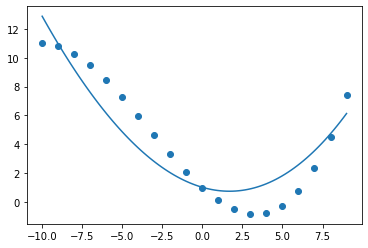

In [49]:
M = Y(np.array([1,-1,.1,.01]),np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .000001, 10,100000)
print(P[-1])

V = f(P[-1],Z)
plt.plot(Z,V)
plt.show()

In [9]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
print(M)
# M_h = 
# plt.scatter(M[0],M[1])
# Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)


# np.set_printoptions(suppress=True,
#    formatter={'float_kind':'{:f}'.format})
# P = evSGDdb(np.array([1,1,1,1]), M, .00001, 10,200000, .1,2)
# print('Corect a:',a)
# print('Termin a:',P[-1])

# V = f(P[-1],Z)
# plt.plot(Z,V)
# plt.show()

[[-10.    -9.    -8.    -7.    -6.    -5.    -4.    -3.    -2.    -1.
    0.     1.     2.     3.     4.     5.     6.     7.     8.     9.  ]
 [ 11.    10.81  10.28   9.47   8.44   7.25   5.96   4.63   3.32   2.09
    1.     0.11  -0.52  -0.83  -0.76  -0.25   0.76   2.33   4.52   7.39]]


<ipython-input-5-e95fd4ab3df0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


[-0.054950 0.518397 -1.084167 18.235611]
[0.987011 -0.973687 0.099956 0.009613]


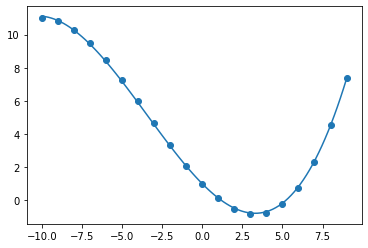

In [36]:
M = Y(np.array([1,-1,.1,.01]),np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,-.9,1,1]), M, .000001, 10,100000)
print(P[-1])

V = f(P[-1],Z)
plt.plot(Z,V)
plt.show()

<ipython-input-5-e95fd4ab3df0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


[0.147680 4.778491 -8.977688 151.219918]
[1.024608 -0.698416 0.096682 0.005812]


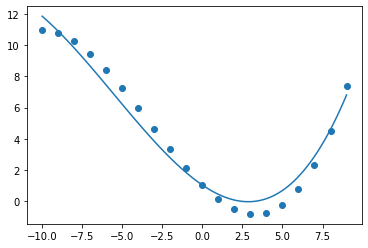

In [47]:
M = Y(np.array([1,-1,.1,.01]),np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .000005, 10,100000)
print(P[-1])

V = f(P[-1],Z)
plt.plot(Z,V)
plt.show()

Below is:
eta l dependent (eta0 = .00001, p =1)
linear a0 not close


Results:
Gradient falls as closer

<ipython-input-5-e95fd4ab3df0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


Gradient: [0.070171 -0.012871 4.077748 -48.944744]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [0.906024 -0.921734 0.100731 0.009048]


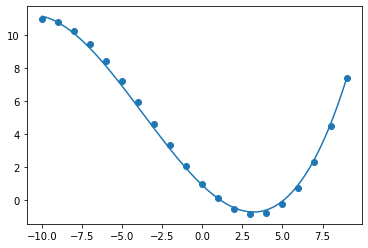

In [17]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .00001, 10,100000)
print('Corect a:',a)
print('Termin a:',P[-1])


V = f(P[-1],Z)
plt.plot(Z,V)
plt.show()

<ipython-input-5-e95fd4ab3df0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


Gradient: [0.018750 -0.001595 0.244361 -1.843548]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [1.019863 -0.997685 0.099633 0.009960]


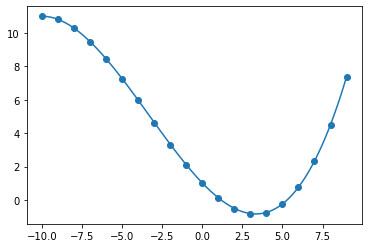

In [16]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .00001, 10,200000)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],Z)
plt.plot(Z,V)
plt.show()

<ipython-input-5-e95fd4ab3df0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


Gradient: [0.012243 -0.007873 -0.016200 0.217139]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [1.015246 -0.999575 0.099734 0.009988]


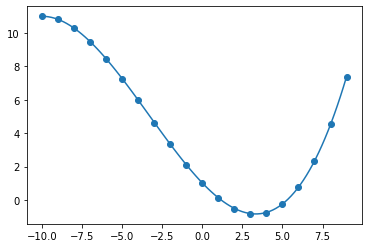

In [18]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .00001, 10,400000)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],Z)
plt.plot(Z,V)
plt.show()

Below is:
eta l dependent, eta0 and p = .2 combinations
linear a is not close


Results:
Highly sensitive to overstepping Early, 
Intial constant must be tuned to l(p) dependence
May be probelm specific
Algorithm connecting the two may be possible

<ipython-input-5-e95fd4ab3df0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


Gradient: [-0.395873 0.150988 1.999533 10.418169]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [0.454805 -0.989977 0.109165 0.009859]


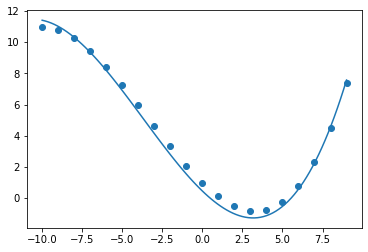

In [29]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .00001, 10,100000, .1)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],Z)
plt.plot(Z,V)
plt.show()

<ipython-input-5-e95fd4ab3df0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


Gradient: [0.013686 0.211621 -0.570339 -17.294110]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [1.023854 -0.952792 0.099130 0.009308]


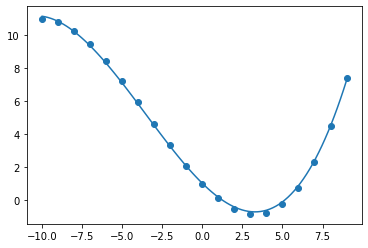

In [31]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .00001, 10,100000, .1)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],Z)
plt.plot(Z,V)
plt.show()

<ipython-input-5-e95fd4ab3df0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


Gradient: [0.019324 0.054863 -0.336836 1.213723]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [1.027016 -0.997504 0.099513 0.009958]


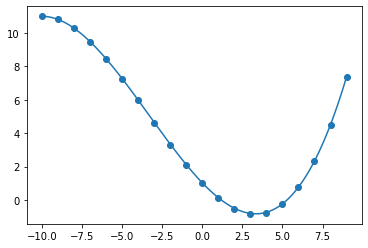

In [34]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .00001, 10,200000, .1)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],Z)
plt.plot(Z,V)
plt.show()

<ipython-input-5-e95fd4ab3df0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


Gradient: [0.023462 0.010166 0.130639 0.000894]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [1.025407 -0.997554 0.099539 0.009955]


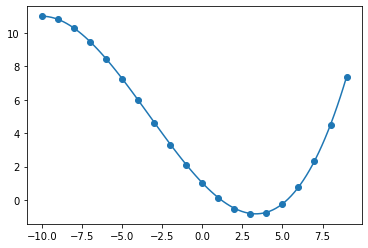

In [37]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .00001, 10,200000, .1)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],Z)
plt.plot(Z,V)
plt.show()

Below is:
eta l dependent (eta0 = .00001, p = .1)
linear a is not close


Results:
**I notice that randomly does worse (much)**
Q: what is a good metric to follow over iterations on error?

<ipython-input-5-e95fd4ab3df0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


Gradient: [-0.476180 8.415280 -32.891604 152.065185]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [1.019769 -0.477567 0.094425 0.002092]


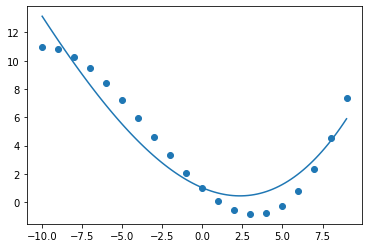

In [40]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .00001, 10,100000, .2)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],Z)
plt.plot(Z,V)
plt.show()

<ipython-input-5-e95fd4ab3df0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


Gradient: [-0.059166 2.374010 -1.090897 12.465120]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [1.029253 -0.812464 0.097524 0.007473]


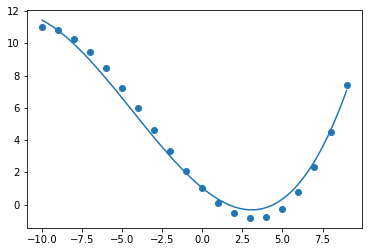

In [39]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .00001, 10,200000, .2)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],Z)
plt.plot(Z,V)
plt.show()

<ipython-input-5-e95fd4ab3df0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])
<ipython-input-5-e95fd4ab3df0>:67: RuntimeWarning: overflow encountered in multiply
  return 2*(f(a,x)-y)*grad_f(a,x)


Gradient: [nan nan nan nan]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [nan nan nan nan]


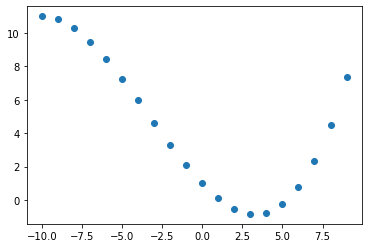

In [41]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .0001, 10,100000, .2)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],Z)
plt.plot(Z,V)
plt.show()

<ipython-input-5-e95fd4ab3df0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


Gradient: [-0.116690 2.228713 -5.526145 40.666077]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [1.066138 -0.764298 0.096788 0.006587]


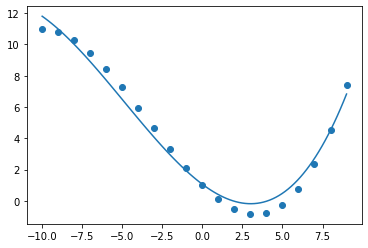

In [46]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .000015, 10,100000, .2)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],Z)
plt.plot(Z,V)
plt.show()

<ipython-input-5-e95fd4ab3df0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


Gradient: [-9245077.418716 -14270059.576184 -93594079.064345 -257734151.537113]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [-7608061.151277 -662992.554085 136795.651614 10811.419008]


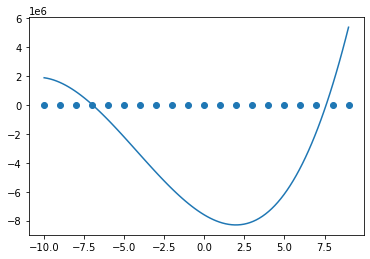

In [47]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .000017, 10,100000, .2)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],Z)
plt.plot(Z,V)
plt.show()

<ipython-input-5-e95fd4ab3df0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


Gradient: [-2.292142 20.071390 -100.070300 -1042.155613]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [-6.953631 4.632141 0.178863 -0.075004]


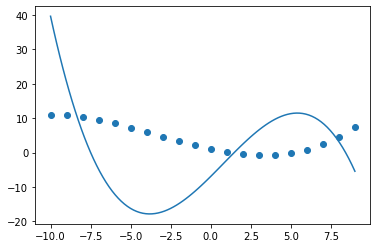

In [48]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .000017, 10,100000, .2)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],Z)
plt.plot(Z,V)
plt.show()

<ipython-input-5-e95fd4ab3df0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


Gradient: [-10785.469612 39430.782158 -389923.616692 -179315.697361]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [2172.586116 5339.976982 -91.049793 -77.072313]


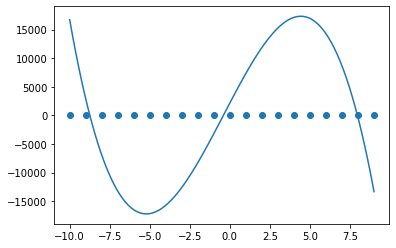

In [51]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .0000155, 10,100000, .2)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],Z)
plt.plot(Z,V)
plt.show()

<ipython-input-5-e95fd4ab3df0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


Gradient: [-22.530536 -5383.918035 -30939.214950 34634.234749]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [338.017342 -437.942265 -1.233698 5.779115]


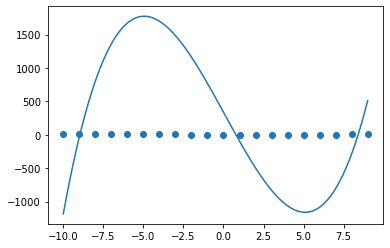

In [52]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .00001533, 10,100000, .2)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],Z)
plt.plot(Z,V)
plt.show()

<ipython-input-5-e95fd4ab3df0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


Gradient: [2045.506447 -19987.772190 -195806.253864 745554.288851]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [6076.935161 -3994.696340 -60.213806 48.682494]


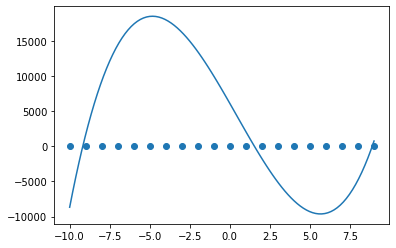

In [55]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .000015, 10,100000, .2)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],Z)
plt.plot(Z,V)
plt.show()

<ipython-input-5-e95fd4ab3df0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


Gradient: [0.604178 6.003979 14.613895 175.266653]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [1.018886 -0.569171 0.095480 0.004070]


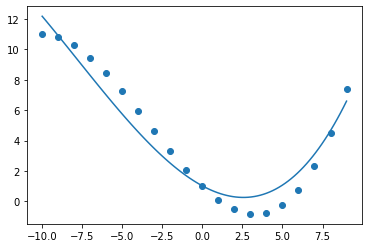

In [61]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .00001, 10,100000, .2)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],Z)
plt.plot(Z,V)
plt.show()

<ipython-input-5-e95fd4ab3df0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


Gradient: [0.381236 -0.385221 13.646101 -290.383526]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [1.019347 -0.544067 0.095045 0.003965]


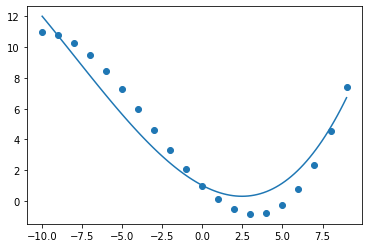

In [64]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .000011, 10,100000, .2)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],Z)
plt.plot(Z,V)
plt.show()

<ipython-input-5-e95fd4ab3df0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


Gradient: [-1.182565 4.463934 -36.866361 -183.178681]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [0.386735 -0.002823 0.099998 -0.004082]


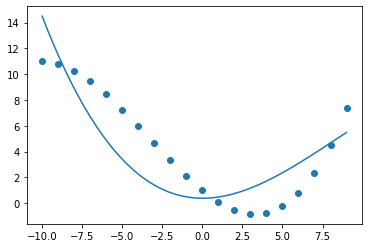

In [65]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .000012, 10,100000, .2)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],Z)
plt.plot(Z,V)
plt.show()

Below is:
eta l dependent, eta0 and p = .5 combinations
linear a is not close


Results:
Highly sensitive to overstepping Early, 
Intial constant must be tuned to l(p) dependence
May be probelm specific
Algorithm connecting the two may be possible

<ipython-input-5-e95fd4ab3df0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


Gradient: [3824511078.923167 98411332963.149078 1201090971176.962402
 -23293555000572.761719]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [-8717073220.459999 42747767752.324707 -271459007.178109 -588406376.247148]


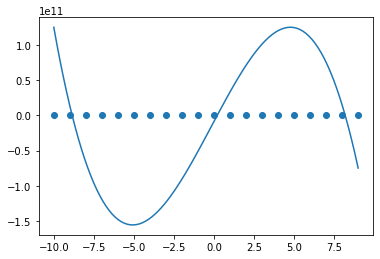

In [69]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .00005, 10,100000, .5)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],Z)
plt.plot(Z,V)
plt.show()

<ipython-input-5-e95fd4ab3df0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


Gradient: [0.051750 2.764695 -1.904824 95.583818]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [0.877559 -0.833974 0.100404 0.007676]


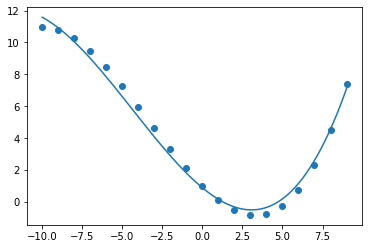

In [70]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .00002, 10,100000, .5)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],Z)
plt.plot(Z,V)
plt.show()

In [106]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .00001, 10,100000, .1)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],Z)
plt.plot(Z,V)
plt.show()

ValueError: shapes (4,) and (20,) not aligned: 4 (dim 0) != 20 (dim 0)

Gradient: [-0.952911 5.184046 18.652453 191.627906]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [-0.613338 -0.849416 0.125662 0.008238]


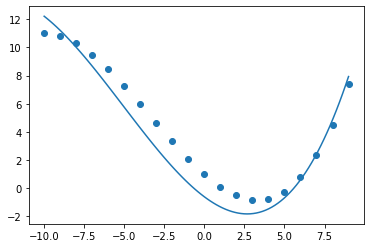

In [52]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)


np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .00001, 10,100000, .1)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],F(Z))
plt.plot(Z,V)
plt.show()

<ipython-input-5-e95fd4ab3df0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


Gradient: [0.704209 23.851688 71.231487 522.530943]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [0.966350 0.612523 0.084344 -0.012558]


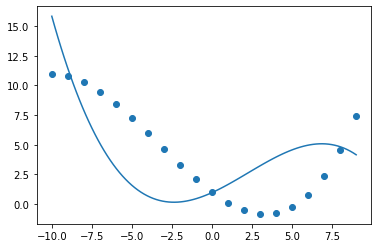

In [76]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .00002, 10,100000, .5)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],Z)
plt.plot(Z,V)
plt.show()

<ipython-input-5-e95fd4ab3df0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


Gradient: [-3.434304 7.355454 -87.315615 -821.174037]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [0.987243 0.842489 0.081506 -0.016068]


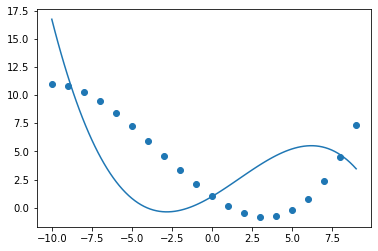

In [80]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .00001, 10,100000, .5)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],Z)
plt.plot(Z,V)
plt.show()

<ipython-input-5-e95fd4ab3df0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


Gradient: [-28.007540 -160.231989 -1214.055261 1509.136220]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [1.414542 -13.448548 0.221006 0.184480]


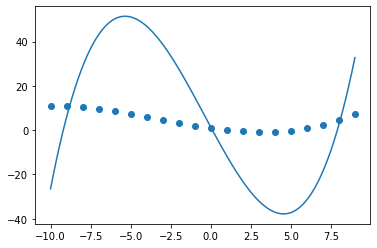

In [81]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .000025, 10,100000, .5)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],Z)
plt.plot(Z,V)
plt.show()

<ipython-input-16-42be6105ab6e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


Gradient: [-0.128982 0.225161 5.492719 2.767220]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [1.016702 -0.997984 0.099694 0.009962]


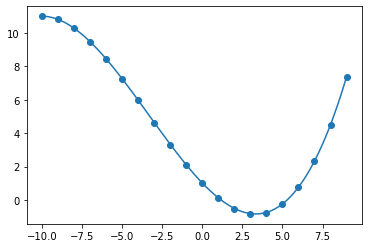

In [69]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P1 = SGD(np.array([1,1,1,1]), M, .00001, 10,200000, .1)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],Z)
plt.plot(Z,V)
plt.show()

In [38]:
S = np.size(P, axis = 0)
C = np.zeros(S)
for i in range(S):
    C[i] = cost(M[0],M[1],P[i])

<ipython-input-16-42be6105ab6e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


array([145641.315050, 1762013.149701, 9272766.931561, ..., 0.000221,
       0.000217, 0.000215])

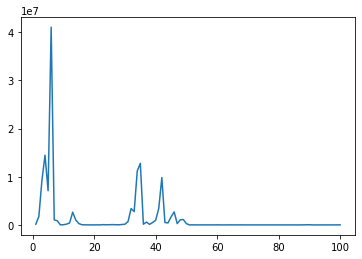

In [47]:
L = 100
N = np.linspace(1,L,L)
plt.plot(N, C[:L])
plt.show()

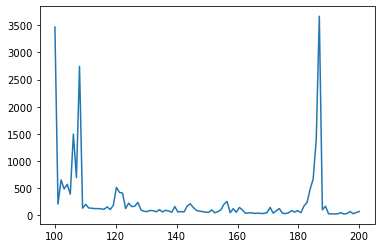

In [55]:
l = 100
L = 200
N = np.linspace(l,L,L-l)
plt.plot(N, C[l:L])
plt.show()

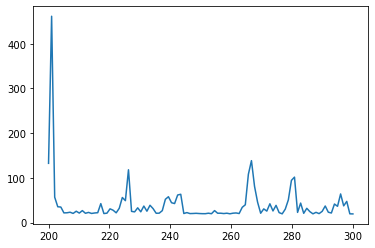

In [56]:
l = 200
L = 300
N = np.linspace(l,L,L-l)
plt.plot(N, C[l:L])
plt.show()

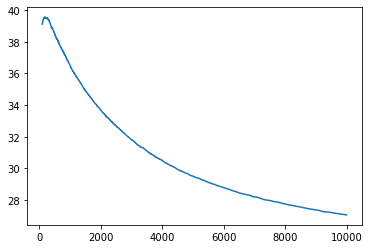

In [40]:
l = 100
L = 10000
N = np.linspace(l,L,L-l)
plt.plot(N, C[l:L])
plt.show()

In [ ]:
l = 100
L = 1100
N = np.linspace(l,L,L-l)
plt.plot(N, C[l:L])
plt.show()

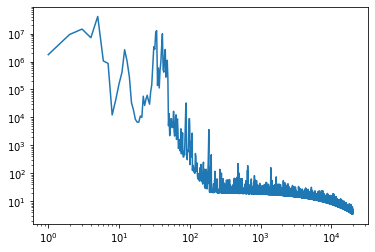

In [60]:
l = 1
L = 20000
N = np.linspace(l,L,L-l)
plt.loglog(N, C[l:L])
plt.show()

<ipython-input-16-42be6105ab6e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


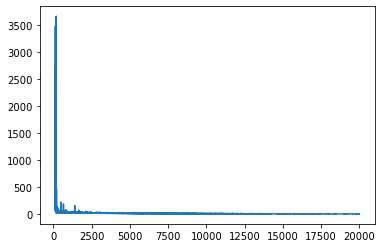

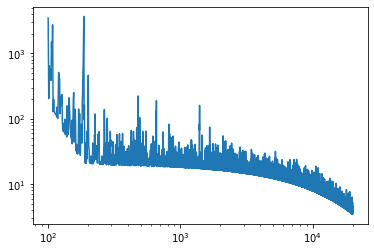

In [62]:
S = np.size(P, axis = 0)
C = np.zeros(S)
for i in range(S):
    C[i] = cost(M[0],M[1],P[i])
    
l = 100
L = 20000
N = np.linspace(l,L,L-l)

plt.plot(N, C[l:L])
plt.show()

plt.loglog(N, C[l:L])
plt.show()

Gradient: [-0.143192 -0.184506 1.602040 6.833479]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [0.778112 -1.005967 0.103861 0.010156]


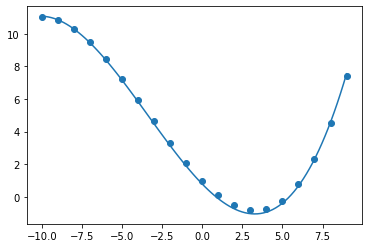

In [14]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .00001, 10,400000, .1)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],F(Z))
plt.plot(Z,V)
plt.show()

Gradient: [0.048924 -0.070417 -0.642659 -3.294068]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [1.055863 -0.997332 0.099029 0.009959]


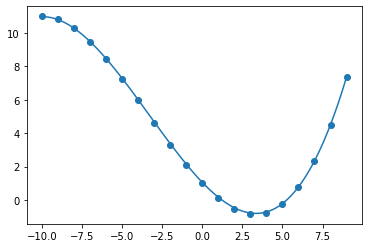

In [15]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = evSGDdb(np.array([1,1,1,1]), M, .00001, 10,200000, .1,2)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],F(Z))
plt.plot(Z,V)
plt.show()

<ipython-input-16-42be6105ab6e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


Gradient: [0.016173 0.013289 0.189854 0.465920]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [1.016702 -0.997984 0.099694 0.009962]


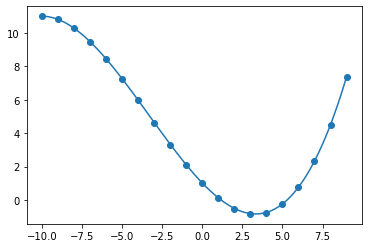

In [67]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = evSGDdb(np.array([1,1,1,1]), M, .00001, 10,200000, .1,2)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],Z)
plt.plot(Z,V)
plt.show()

In [41]:
S = np.size(P, axis = 0)
C = np.zeros(S)
for i in range(S):
    C[i] = cost(F(M[0]),M[1],P[i])
    
l = 100
L = 20000
N = np.linspace(l,L,L-l)

plt.plot(N, C[l:L])
plt.show()

plt.loglog(N, C[l:L])
plt.show()

ValueError: shapes (4,) and (2,20) not aligned: 4 (dim 0) != 2 (dim 0)

Gradient: [0.044719 0.489331 2.531571 -6.663950]
Corect a: [1.000000 -1.000000 0.100000 0.010000]
Termin a: [1.028350 -0.951673 0.099072 0.009333]


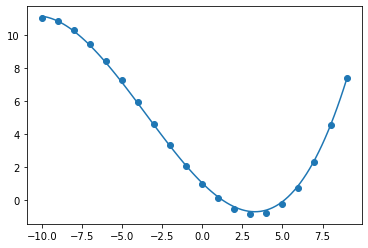

In [53]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = evSGDdb(np.array([1,1,1,1]), M, .00001, 10,100000, .1,2)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],F(Z))
plt.plot(Z,V)
plt.show()

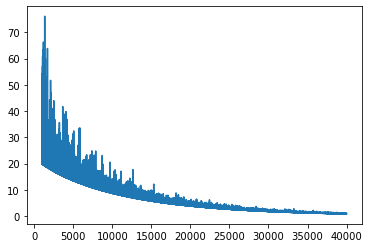

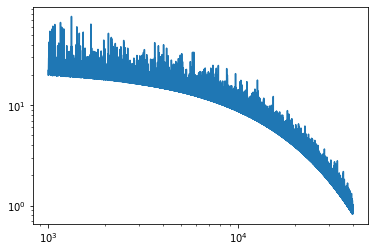

In [55]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = evSGDdb(np.array([1,1,1,1]), M, .00001, 10,100000, .1,2)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],F(Z))
plt.plot(Z,V)
plt.show()

S = np.size(P, axis = 0)
C = np.zeros(S)
for i in range(S):
    C[i] = cost(F(M[0]),M[1],P[i])
    
l = 1000
L = 40000
N = np.linspace(l,L,L-l)

plt.plot(N, C[l:L])
plt.show()

plt.loglog(N, C[l:L])
plt.show()

In [54]:
S = np.size(P, axis = 0)
C = np.zeros(S)
K = np.zeros(S)
for i in range(S):
    C[i] = cost(M[0],M[1],P[i])
    K[i] = cost(M[0],M[1],P1[i])
    
l = 1
L = 40000
N = np.linspace(l,L,L-l)

plt.plot(N, C[l:L])
plt.plot(N, K[l:L])
plt.show()

plt.loglog(N, C[l:L])
plt.loglog(N, K[l:L])
plt.show()

ValueError: shapes (4,) and (20,) not aligned: 4 (dim 0) != 20 (dim 0)

In [42]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = SGD(np.array([1,1,1,1]), M, .000001, 10,400000, .1)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],F(Z))
plt.plot(Z,V)
plt.show()

ValueError: shapes (4,) and (2,20) not aligned: 4 (dim 0) != 2 (dim 0)

In [43]:
a = np.array([1,-1,.1,.01])
M = Y(a,np.array([(i-10) for i in range(20)]), s = 0, norm = False)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
#W = 1 + Z
#plt.plot(Z,W)

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
P = evSGDdb(np.array([1,1,1,1]), M, .00001, 10,200000, .1,2)
print('Corect a:',a)
print('Termin a:',P[-1])

V = f(P[-1],F(Z))
plt.plot(Z,V)
plt.show()

S = np.size(P, axis = 0)
C = np.zeros(S)
for i in range(S):
    C[i] = cost(F(M[0]),M[1],P[i])
    
l = 1000
L = 40000
N = np.linspace(l,L,L-l)

plt.plot(N, C[l:L])
plt.show()

plt.loglog(N, C[l:L])
plt.show()

ValueError: shapes (4,) and (2,20) not aligned: 4 (dim 0) != 2 (dim 0)